In [29]:
import json
import os 
from pathlib import Path
import pandas as pd
import numpy as np

Model Cost

In [30]:
base = Path(os.getcwd())
model_info_file_path = base/'data'/'model_data'/'models_info.json'
model_info = pd.read_json(model_info_file_path).T


In [31]:
cost_for_each_model = model_info['co2_cost']
cost_for_each_model

MaziyarPanahi/calme-3.2-instruct-78b        66.01
Qwen/Qwen2.5-0.5B-Instruct                   1.24
Qwen/Qwen2.5-1.5B-Instruct                   1.37
Qwen/Qwen2.5-14B-Instruct                    3.55
Qwen/Qwen2.5-32B-Instruct                    11.5
Qwen/Qwen2.5-3B-Instruct                     2.78
Qwen/Qwen2.5-72B-Instruct                   47.65
Qwen/Qwen2.5-7B-Instruct                     3.24
deepseek-ai/DeepSeek-R1-Distill-Qwen-14B     3.99
deepseek-ai/DeepSeek-R1-Distill-Qwen-32B    47.28
deepseek-ai/DeepSeek-R1-Distill-Qwen-7B      1.37
meta-llama/Llama-3.1-70B-Instruct           40.22
meta-llama/Llama-3.1-8B-Instruct             2.11
meta-llama/Llama-3.2-1B-Instruct             0.81
meta-llama/Llama-3.2-3B-Instruct             1.93
meta-llama/Llama-3.3-70B-Instruct           76.56
Name: co2_cost, dtype: object

Extracted dataset OOD

In [32]:
extracted_data_file_path = base/'data'/'model_data'/'extracted_dataset_samples_ood.jsonl'
extracted_data = pd.read_json(extracted_data_file_path, lines=True)
extracted_data


,query,answer,model,dataset,subset,correct,query_id
0,"A large gene has dozens of exons, of which the...",(D),MaziyarPanahi/calme-3.2-instruct-78b,gpqa,main,1,gpqa_q0
1,"A large gene has dozens of exons, of which the...",(B),MaziyarPanahi/calme-3.2-instruct-78b,gpqa,extended,1,gpqa_q0
2,"A large gene has dozens of exons, of which the...",(D),Qwen/Qwen2.5-32B-Instruct,gpqa,main,0,gpqa_q0
3,"A large gene has dozens of exons, of which the...",(D),Qwen/Qwen2.5-32B-Instruct,gpqa,extended,0,gpqa_q0
4,"A large gene has dozens of exons, of which the...",(D),Qwen/Qwen2.5-72B-Instruct,gpqa,main,0,gpqa_q0
...,...,...,...,...,...,...,...
31163,"In the dynamic realm of technology, a prestigi...","Software Development: Alice, Project Managemen...",meta-llama/Llama-3.2-3B-Instruct,musr,team_allocation,0,musr_q755
31164,"In the dynamic realm of technology, a prestigi...","Software Development: Alice, Project Managemen...",meta-llama/Llama-3.2-1B-Instruct,musr,team_allocation,0,musr_q755
31165,"In the dynamic realm of technology, a prestigi...","Software Development: Alice, Project Managemen...",deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,musr,team_allocation,1,musr_q755
31166,"In the dynamic realm of technology, a prestigi...","Software Development: Alice, Project Managemen...",deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,musr,team_allocation,1,musr_q755


Notice, it the query may existed in both main and subset, and the output may different, we need to collect them all to determine whether they are acutally right 

In [33]:
unique_extracted_data = extracted_data.groupby(['query_id','model'])['correct'].mean().reset_index()
unique_extracted_data

,query_id,model,correct
0,gpqa_q0,MaziyarPanahi/calme-3.2-instruct-78b,1.0
1,gpqa_q0,Qwen/Qwen2.5-0.5B-Instruct,0.5
2,gpqa_q0,Qwen/Qwen2.5-1.5B-Instruct,0.0
3,gpqa_q0,Qwen/Qwen2.5-14B-Instruct,0.0
4,gpqa_q0,Qwen/Qwen2.5-32B-Instruct,0.0
...,...,...,...
20811,musr_q99,meta-llama/Llama-3.1-70B-Instruct,1.0
20812,musr_q99,meta-llama/Llama-3.1-8B-Instruct,1.0
20813,musr_q99,meta-llama/Llama-3.2-1B-Instruct,1.0
20814,musr_q99,meta-llama/Llama-3.2-3B-Instruct,1.0


Read Model csv

In [34]:
model_score_df = pd.read_csv('all_alpha_model.csv')
model_score_df

,Unnamed: 0,query_id,best_model,score,alpha
0,0,gpqa_q0,MaziyarPanahi/calme-3.2-instruct-78b,0.826828,0.00
1,1,gpqa_q1,MaziyarPanahi/calme-3.2-instruct-78b,0.644907,0.00
2,2,gpqa_q2,MaziyarPanahi/calme-3.2-instruct-78b,0.786405,0.00
3,3,gpqa_q3,MaziyarPanahi/calme-3.2-instruct-78b,0.606267,0.00
4,4,gpqa_q4,MaziyarPanahi/calme-3.2-instruct-78b,0.885207,0.00
...,...,...,...,...,...
130095,130095,musr_q751,meta-llama/Llama-3.2-1B-Instruct,0.001927,0.99
130096,130096,musr_q752,meta-llama/Llama-3.2-1B-Instruct,0.001705,0.99
130097,130097,musr_q753,meta-llama/Llama-3.2-1B-Instruct,0.001777,0.99
130098,130098,musr_q754,meta-llama/Llama-3.2-1B-Instruct,0.001881,0.99


In [35]:
def select_from_alpha(model_score_df,alpha):
    sel = model_score_df['alpha']==alpha
    selected_df = model_score_df[sel].copy()

    return selected_df[["query_id","best_model","score","alpha"]]


In [36]:
def eval_selection(model_score_df,extracted_data,cost_map,alpha):
    unique_extracted_data = extracted_data.groupby(['query_id','model'])['correct'].mean().reset_index()
    selection_df = select_from_alpha(model_score_df,alpha)
    merged_df = pd.merge(selection_df, unique_extracted_data, left_on=['query_id','best_model'], right_on=['query_id','model'], how='left')
    mena_acc = merged_df['correct'].mean()

    mean_cost = merged_df['best_model'].map(cost_map).mean()
    return mena_acc, mean_cost


In [37]:
eval_selection(model_score_df,extracted_data,cost_for_each_model,0.01)

(np.float64(0.5183448629259544), np.float64(65.67481168331982))

Evaluation For OOD 

In [38]:

def plot_acc_cost_curve(model_score_df,extracted_data,cost_map):
    accs = []
    costs = []
    alphas = sorted(model_score_df['alpha'].unique())

    for alpha in alphas:
        mena_acc, mean_cost = eval_selection(model_score_df,extracted_data,cost_map,alpha)
        accs.append(mena_acc)
        costs.append(mean_cost)
    return alphas, accs, costs


    


PLOT (EVAL for OOD Data)

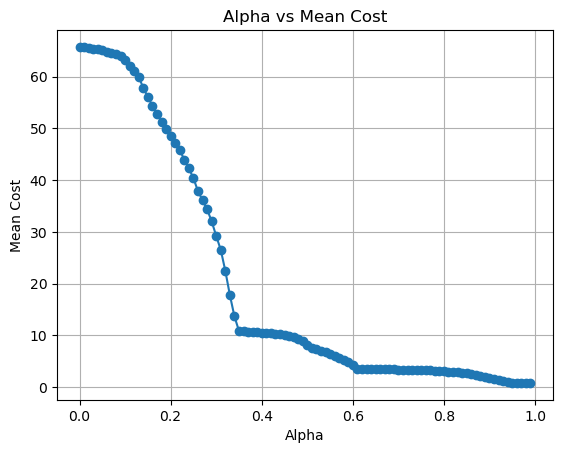

In [39]:
alphas, accs, costs = plot_acc_cost_curve(model_score_df,extracted_data,cost_for_each_model)
import matplotlib.pyplot as plt
plt.plot(alphas, costs, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Cost')
plt.title('Alpha vs Mean Cost')
plt.grid()
plt.show()

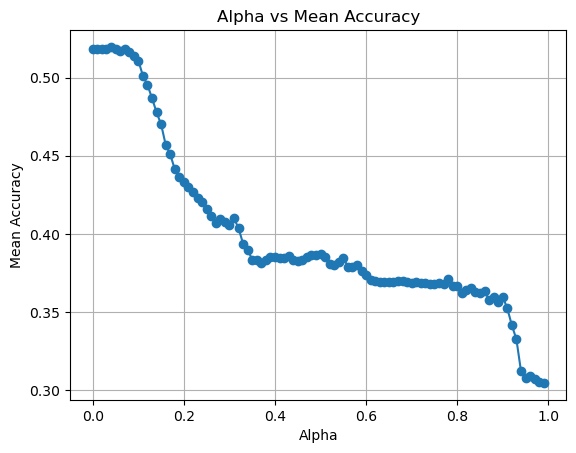

In [40]:
plt.plot(alphas, accs, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.title('Alpha vs Mean Accuracy')
plt.grid()
plt.show()

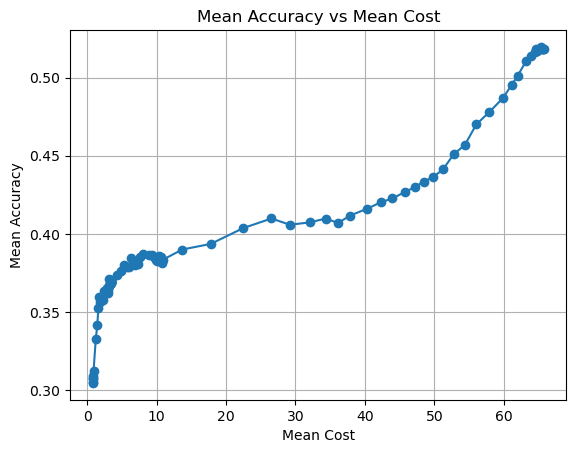

In [41]:
plt.plot(costs, accs, marker='o')
plt.xlabel('Mean Cost')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs Mean Cost')
plt.grid()
plt.show()


In [42]:
acc_df = pd.DataFrame({
    'alpha': alphas,
    'mean_accuracy': accs,
    'mean_cost': costs
})
acc_df

,alpha,mean_accuracy,mean_cost
0,0.00,0.518345,65.758609
1,0.01,0.518345,65.674812
2,0.02,0.518345,65.632913
3,0.03,0.518345,65.453098
4,0.04,0.519626,65.327402
...,...,...,...
95,0.95,0.307789,0.847156
96,0.96,0.308942,0.829308
97,0.97,0.307405,0.816026
98,0.98,0.305611,0.811722


ID ALpha data

In [43]:
model_score_ID_df = pd.read_csv('all_alpha_model_ID.csv')
model_score_ID_df

,Unnamed: 0,query_id,best_model,score,alpha
0,0,bbh_q0,Qwen/Qwen2.5-72B-Instruct,0.996412,0.00
1,1,bbh_q1,Qwen/Qwen2.5-72B-Instruct,0.965912,0.00
2,2,bbh_q2,Qwen/Qwen2.5-72B-Instruct,0.974069,0.00
3,3,bbh_q3,Qwen/Qwen2.5-72B-Instruct,0.993087,0.00
4,4,bbh_q4,Qwen/Qwen2.5-72B-Instruct,0.984613,0.00
...,...,...,...,...,...
1870495,1870495,mmlu_pro_q11640,meta-llama/Llama-3.2-1B-Instruct,0.001290,0.99
1870496,1870496,mmlu_pro_q11641,meta-llama/Llama-3.2-1B-Instruct,0.002730,0.99
1870497,1870497,mmlu_pro_q11642,meta-llama/Llama-3.2-1B-Instruct,0.000679,0.99
1870498,1870498,mmlu_pro_q11643,meta-llama/Llama-3.2-1B-Instruct,0.000421,0.99


Extracted Dataset ID

In [44]:
extracted_data_ID_file_path = base/'data'/'model_data'/'extracted_dataset_samples.jsonl'
extracted_data_ID = pd.read_json(extracted_data_ID_file_path, lines=True)
extracted_data_ID

,query,answer,model,dataset,subset,correct,query_id
0,not ( True ) and ( True ) is,False,MaziyarPanahi/calme-3.2-instruct-78b,bbh,boolean_expressions,1,bbh_q0
1,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-32B-Instruct,bbh,boolean_expressions,1,bbh_q0
2,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-72B-Instruct,bbh,boolean_expressions,1,bbh_q0
3,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-14B-Instruct,bbh,boolean_expressions,1,bbh_q0
4,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-7B-Instruct,bbh,boolean_expressions,1,bbh_q0
...,...,...,...,...,...,...,...
305867,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,mmlu_pro,None,0,mmlu_pro_q11642
305868,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,mmlu_pro,None,0,mmlu_pro_q11642
305869,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,mmlu_pro,None,0,mmlu_pro_q11642
305870,Suppose there are 100 identical firms in a per...,A,meta-llama/Llama-3.1-70B-Instruct,mmlu_pro,None,0,mmlu_pro_q11643


In [45]:
alphas_ID, accs_ID, costs_ID =plot_acc_cost_curve(model_score_ID_df,extracted_data_ID,cost_for_each_model)

PLOT (EVAL ID data)

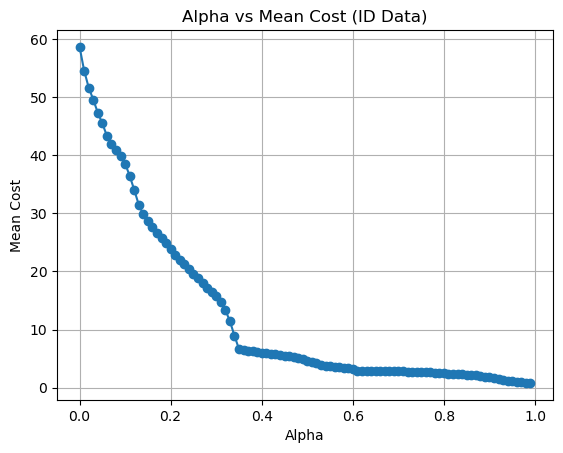

In [46]:
import matplotlib.pyplot as plt
plt.plot(alphas_ID, costs_ID, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Cost')
plt.title('Alpha vs Mean Cost (ID Data)')
plt.grid()
plt.show()

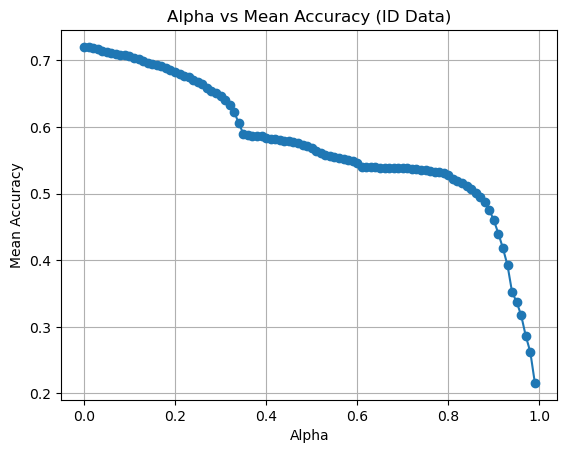

In [47]:
plt.plot(alphas_ID,accs_ID, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.title('Alpha vs Mean Accuracy (ID Data)')
plt.grid()
plt.show()


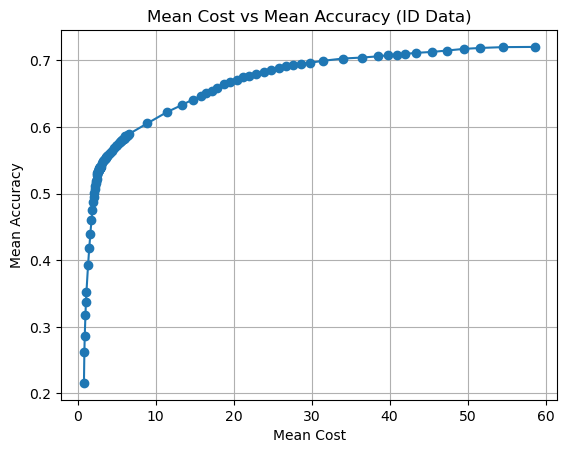

In [48]:
plt.plot(costs_ID, accs_ID, marker='o')
plt.xlabel('Mean Cost')
plt.ylabel('Mean Accuracy')
plt.title('Mean Cost vs Mean Accuracy (ID Data)')
plt.grid()
plt.show()

In [49]:
acc_df_ID= pd.DataFrame({
    'alpha': alphas_ID,
    'mean_accuracy': accs_ID,
    'mean_cost': costs_ID 
})
acc_df_ID

,alpha,mean_accuracy,mean_cost
0,0.00,0.720204,58.608616
1,0.01,0.719903,54.545210
2,0.02,0.718656,51.623299
3,0.03,0.717292,49.550744
4,0.04,0.714752,47.302959
...,...,...,...
95,0.95,0.337303,1.062435
96,0.96,0.317046,1.001726
97,0.97,0.286344,0.913617
98,0.98,0.262184,0.865416


In [50]:
acc_df_ID[acc_df_ID["mean_accuracy"].between(0.5,0.6)]

,alpha,mean_accuracy,mean_cost
35,0.35,0.589764,6.631006
36,0.36,0.587224,6.472725
37,0.37,0.587206,6.348561
38,0.38,0.585763,6.226573
39,0.39,0.586137,6.119084
40,0.40,0.584052,6.017687
41,0.41,0.582661,5.930862
42,0.42,0.581993,5.829632
43,0.43,0.581004,5.729309
44,0.44,0.579667,5.623519


Save accuracy cost dataframe 

In [51]:
acc_df_ID.to_csv('accuracy_cost_curve_ID.csv', index=False)
acc_df.to_csv('accuracy_cost_curve_ood.csv', index=False)

Compare to Baseline 

In [ ]:
BERT 

In [53]:
baseline_scores_bert = pd.read_json('bert_router_scores.jsonl', lines=True)
baseline_scores_bert

,query_id,dataset,subset,query,router,score
0,bbh_q0,bbh,boolean_expressions,not ( True ) and ( True ) is,bert,0.394552
1,bbh_q1,bbh,boolean_expressions,not True or False or ( False ) is,bert,0.420922
2,bbh_q2,bbh,boolean_expressions,True or not False and True and False is,bert,0.432683
3,bbh_q3,bbh,boolean_expressions,not True and ( False or True ) is,bert,0.408421
4,bbh_q4,bbh,boolean_expressions,not True or ( False and True ) is,bert,0.408717
...,...,...,...,...,...,...
18700,mmlu_pro_q11640,mmlu_pro,None,A hot mild steel rod is placed in a carbonaceo...,bert,0.468887
18701,mmlu_pro_q11641,mmlu_pro,None,Consider the evaporation of liquid ammonia int...,bert,0.464472
18702,mmlu_pro_q11642,mmlu_pro,None,The frequency range of a commercially broadcas...,bert,0.467289
18703,mmlu_pro_q11643,mmlu_pro,None,Suppose there are 100 identical firms in a per...,bert,0.446196


In [54]:
extracted_data_ID

,query,answer,model,dataset,subset,correct,query_id
0,not ( True ) and ( True ) is,False,MaziyarPanahi/calme-3.2-instruct-78b,bbh,boolean_expressions,1,bbh_q0
1,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-32B-Instruct,bbh,boolean_expressions,1,bbh_q0
2,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-72B-Instruct,bbh,boolean_expressions,1,bbh_q0
3,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-14B-Instruct,bbh,boolean_expressions,1,bbh_q0
4,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-7B-Instruct,bbh,boolean_expressions,1,bbh_q0
...,...,...,...,...,...,...,...
305867,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,mmlu_pro,None,0,mmlu_pro_q11642
305868,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,mmlu_pro,None,0,mmlu_pro_q11642
305869,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,mmlu_pro,None,0,mmlu_pro_q11642
305870,Suppose there are 100 identical firms in a per...,A,meta-llama/Llama-3.1-70B-Instruct,mmlu_pro,None,0,mmlu_pro_q11643


In [56]:
slm = "Qwen/Qwen2.5-0.5B-Instruct"
llm = "MaziyarPanahi/calme-3.2-instruct-78b"

In [57]:
pct = np.arange(0, 101, 5)
thresholds = np.percentile(baseline_scores_bert["score"].to_numpy(), pct)

In [79]:
correct_raw = (extracted_data_ID.loc[extracted_data_ID['model'].isin([slm, llm]),["query_id","model","correct"]]# select only SLM and LLM
                 .drop_duplicates(["query_id","model"]) # remove duplicates
                 .pivot(index="query_id", columns="model", values="correct")# pivot table
                 .reindex(columns=[slm, llm]))
has_table = correct_raw.notna().astype(int)
correct_table = correct_raw.fillna(0)
correct_table

model,Qwen/Qwen2.5-0.5B-Instruct,MaziyarPanahi/calme-3.2-instruct-78b
query_id,,
bbh_q0,1.0,1.0
bbh_q1,1.0,0.0
bbh_q10,1.0,1.0
bbh_q100,1.0,1.0
bbh_q1000,0.0,1.0
...,...,...
mmlu_pro_q9995,0.0,0.0
mmlu_pro_q9996,0.0,0.0
mmlu_pro_q9997,0.0,0.0


In [87]:
baseline_Bert_df = (baseline_scores_bert[["query_id","score"]]
    .merge(correct_table,left_on ="query_id",right_index=True,how="left")
    .merge(has_table.add_prefix("has_"),left_on ="query_id",right_index=True,how="left")
    .fillna(0))
baseline_Bert_df

,query_id,score,Qwen/Qwen2.5-0.5B-Instruct,MaziyarPanahi/calme-3.2-instruct-78b,has_Qwen/Qwen2.5-0.5B-Instruct,has_MaziyarPanahi/calme-3.2-instruct-78b
0,bbh_q0,0.394552,1.0,1.0,1.0,1.0
1,bbh_q1,0.420922,1.0,0.0,1.0,1.0
2,bbh_q2,0.432683,0.0,1.0,1.0,1.0
3,bbh_q3,0.408421,1.0,1.0,1.0,1.0
4,bbh_q4,0.408717,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
18700,mmlu_pro_q11640,0.468887,1.0,1.0,1.0,1.0
18701,mmlu_pro_q11641,0.464472,0.0,1.0,1.0,1.0
18702,mmlu_pro_q11642,0.467289,0.0,1.0,1.0,1.0
18703,mmlu_pro_q11643,0.446196,0.0,0.0,0.0,0.0


Convert baseline_Bert_df column to numpy 

In [94]:
scores_bert=baseline_Bert_df["score"].to_numpy()
slm_column = baseline_Bert_df[slm].to_numpy()
llm_column = baseline_Bert_df[llm].to_numpy()

In [95]:
has_slm_column = baseline_Bert_df["has_"+slm].to_numpy()
has_llm_column = baseline_Bert_df["has_"+llm].to_numpy()

Their cost 

In [96]:
cost_slm = cost_for_each_model[slm]
cost_llm = cost_for_each_model[llm]

In [111]:
mean_accuracy_Bert_baseline = []
mean_cost_Bert_baseline = []

In [112]:
for t in thresholds:
    use_slm = scores_bert>t
    acc_vec = np.where(use_slm, has_slm_column*slm_column, has_llm_column*llm_column)#if not find, do not  add
    mean_accuracy_Bert_baseline.append(acc_vec.mean())

    cost_vec = np.where(use_slm, cost_slm*has_slm_column, cost_llm*has_llm_column)#if not find, do not add
    mean_cost_Bert_baseline.append(cost_vec.mean())

MF

In [131]:
baseline_scores_mf = pd.read_json('mf_router_scores.jsonl', lines=True)
baseline_scores_mf

,query_id,dataset,subset,query,router,score
0,bbh_q0,bbh,boolean_expressions,not ( True ) and ( True ) is,mf,0.828239
1,bbh_q1,bbh,boolean_expressions,not True or False or ( False ) is,mf,0.806490
2,bbh_q2,bbh,boolean_expressions,True or not False and True and False is,mf,0.803951
3,bbh_q3,bbh,boolean_expressions,not True and ( False or True ) is,mf,0.809753
4,bbh_q4,bbh,boolean_expressions,not True or ( False and True ) is,mf,0.814088
...,...,...,...,...,...,...
18700,mmlu_pro_q11640,mmlu_pro,None,A hot mild steel rod is placed in a carbonaceo...,mf,0.687482
18701,mmlu_pro_q11641,mmlu_pro,None,Consider the evaporation of liquid ammonia int...,mf,0.636182
18702,mmlu_pro_q11642,mmlu_pro,None,The frequency range of a commercially broadcas...,mf,0.611274
18703,mmlu_pro_q11643,mmlu_pro,None,Suppose there are 100 identical firms in a per...,mf,0.770183


In [132]:
pct = np.arange(0, 101, 5)
MF_thresholds = np.percentile(baseline_scores_mf["score"].to_numpy(), pct)

In [133]:
baseline_MF_df = (baseline_scores_mf[["query_id","score"]]
    .merge(correct_table,left_on ="query_id",right_index=True,how="left")
    .merge(has_table.add_prefix("has_"),left_on ="query_id",right_index=True,how="left")
    .fillna(0))
baseline_MF_df

,query_id,score,Qwen/Qwen2.5-0.5B-Instruct,MaziyarPanahi/calme-3.2-instruct-78b,has_Qwen/Qwen2.5-0.5B-Instruct,has_MaziyarPanahi/calme-3.2-instruct-78b
0,bbh_q0,0.828239,1.0,1.0,1.0,1.0
1,bbh_q1,0.806490,1.0,0.0,1.0,1.0
2,bbh_q2,0.803951,0.0,1.0,1.0,1.0
3,bbh_q3,0.809753,1.0,1.0,1.0,1.0
4,bbh_q4,0.814088,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
18700,mmlu_pro_q11640,0.687482,1.0,1.0,1.0,1.0
18701,mmlu_pro_q11641,0.636182,0.0,1.0,1.0,1.0
18702,mmlu_pro_q11642,0.611274,0.0,1.0,1.0,1.0
18703,mmlu_pro_q11643,0.770183,0.0,0.0,0.0,0.0


Convert baseline_MF_df column to numpy 

In [134]:
scores_MF=baseline_MF_df["score"].to_numpy()
slm_column = baseline_MF_df[slm].to_numpy()
llm_column = baseline_MF_df[llm].to_numpy()

In [135]:
has_slm_column = baseline_MF_df["has_"+slm].to_numpy()
has_llm_column = baseline_MF_df["has_"+llm].to_numpy()

COST

In [136]:
cost_slm = cost_for_each_model[slm]
cost_llm = cost_for_each_model[llm]

In [137]:
mean_accuracy_MF_baseline = []
mean_cost_MF_baseline = []

In [138]:
for t in MF_thresholds:
    use_slm = scores_MF>t
    acc_vec = np.where(use_slm, has_slm_column*slm_column, has_llm_column*llm_column)#if not find, do not  add
    mean_accuracy_MF_baseline.append(acc_vec.mean())

    cost_vec = np.where(use_slm, cost_slm*has_slm_column, cost_llm*has_llm_column)#if not find, do not add
    mean_cost_MF_baseline.append(cost_vec.mean())

PLOT TO ID graph 

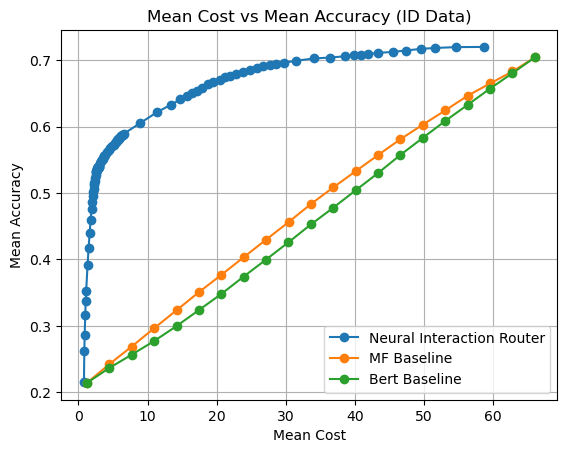

In [139]:
plt.plot(costs_ID, accs_ID, marker='o',label="Neural Interaction Router")
plt.plot(mean_cost_MF_baseline, mean_accuracy_MF_baseline, marker='o',label='MF Baseline')
plt.plot(mean_cost_Bert_baseline, mean_accuracy_Bert_baseline, marker='o',label='Bert Baseline')
plt.legend()
plt.xlabel('Mean Cost')
plt.ylabel('Mean Accuracy')
plt.title('Mean Cost vs Mean Accuracy (ID Data)')
plt.grid()
plt.show()